# 세번째 시도

Key Attempts:
- 감독, 배급사, 배우, 장르, 개봉월은 각 레이블의 관객수 중압값으로 치환
- 국가는 0,1 레이블 인코딩
- 감독, 배급사, 배우, 장르, 개봉월, 상영시간 normalise

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/join_final_v2.csv', encoding='utf-8-sig', thousands=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   runTm        6806 non-null   float64
 1   nation       6806 non-null   int64  
 2   genre        6806 non-null   int64  
 3   director     6806 non-null   object 
 4   actor        6806 non-null   object 
 5   is_adult     6806 non-null   float64
 6   distributor  6806 non-null   object 
 7   view         6806 non-null   int64  
 8   openMonth    6806 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 478.7+ KB


## 1. 메디안 값 치환

In [4]:
# 감독, 배우, 배급사 각각의 중앙 값 테이블 만들기
director = df.groupby('director').agg({"view":"median"}).reset_index()
actor = df.groupby('actor').agg({"view":"median"}).reset_index()
distributor = df.groupby('distributor').agg({"view":"median"}).reset_index()
month = df.groupby('openMonth').agg({"view":"median"}).reset_index()
genre = df.groupby('genre').agg({"view":"median"}).reset_index()

In [5]:
for idx, row in df.iterrows():
    act = row['actor']
    dist = row['distributor']
    dir = row['director']
    m = row['openMonth']
    g = row['genre']

    a_val = actor[actor['actor'] == act]['view'].values[0]
    df.loc[idx, 'actor'] = a_val

    dist_val = distributor[distributor['distributor'] == dist]['view'].values[0]
    df.loc[idx, 'distributor'] = dist_val

    dir_val = director[director['director'] == dir]['view'].values[0]
    df.loc[idx, 'director'] = dir_val

    m_val = month[month['openMonth'] == m]['view'].values[0]
    df.loc[idx, 'openMonth'] = m_val

    g_val = genre[genre['genre'] == g]['view'].values[0]
    df.loc[idx, 'genre'] = g_val

In [6]:
df.head()

,runTm,nation,genre,director,actor,is_adult,distributor,view,openMonth
0,136.0,2,13326.0,954845.5,167141.0,0.0,528537.0,1865469,24457.5
1,119.0,3,148406.0,2674.0,17258.0,0.0,8048.0,24634,41439.0
2,116.0,1,49803.5,6065474.0,3024666.0,1.0,708108.5,943241,29048.0
3,125.0,2,13326.0,507938.5,58644.0,0.0,13547.0,85594,23178.5
4,105.0,1,31655.0,193554.0,193554.0,0.0,62026.0,193554,30576.0


## 2. 관객 수 범주형 변환

In [7]:
for idx, row in df.iterrows():
    val = row['view']
    if val <10000:
        df.loc[idx, 'view'] = 1
    elif val <100000:
        df.loc[idx, 'view'] = 2
    elif val <200000:
        df.loc[idx, 'view'] = 3
    elif val <400000:
        df.loc[idx, 'view'] = 4
    elif val <600000:
        df.loc[idx, 'view'] = 5
    elif val <800000:
        df.loc[idx, 'view'] = 6
    elif val <1000000:
        df.loc[idx, 'view'] = 7
    else:
        df.loc[idx, 'view'] = 8

## 3. 라벨인코딩

In [8]:
y = df['view']
X = df.drop('view', axis=1)

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   runTm        6806 non-null   float64
 1   nation       6806 non-null   int64  
 2   genre        6806 non-null   float64
 3   director     6806 non-null   object 
 4   actor        6806 non-null   object 
 5   is_adult     6806 non-null   float64
 6   distributor  6806 non-null   object 
 7   openMonth    6806 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 425.5+ KB


In [10]:
X = pd.get_dummies(data = X, columns=['nation'], prefix='region')

In [11]:
X.columns

Index(['runTm', 'genre', 'director', 'actor', 'is_adult', 'distributor',
       'openMonth', 'region_1', 'region_2', 'region_3'],
      dtype='object')

## 4. 데이터 스플릿

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

## 5. Normalise

In [13]:
X_train

,runTm,genre,director,actor,is_adult,distributor,openMonth,region_1,region_2,region_3
619,111.0,17246.0,219824.0,219824.0,0.0,374215.0,36139.0,1,0,0
1314,78.0,39946.5,214097.0,32517.5,0.0,16143.0,30576.0,0,0,1
861,98.0,74600.5,161342.5,146660.5,1.0,352226.5,24457.5,0,0,1
5384,123.0,13326.0,11067.0,11067.0,0.0,50196.0,36139.0,1,0,0
4283,119.0,39946.5,44770.5,49832.0,0.0,7213.0,23178.5,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4209,104.0,31655.0,47923.0,603634.0,0.0,528537.0,51487.5,0,1,0
726,110.0,31655.0,1049616.5,446780.0,0.0,352226.5,16952.0,1,0,0
1414,166.0,13326.0,477329.5,275944.5,0.0,367308.0,51487.5,0,1,0
1523,100.0,31655.0,60219.0,117006.0,0.0,361682.5,51487.5,1,0,0


In [14]:
# train data의 runTm 컬럼만 normalisation fit 적용
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X_train.iloc[:,0:7] = mm.fit_transform(X_train.iloc[:, 0:7])

In [15]:
X_train

,runTm,genre,director,actor,is_adult,distributor,openMonth,region_1,region_2,region_3
619,0.309091,0.072392,0.019324,0.021998,0.0,0.145299,0.555573,1,0,0
1314,0.159091,0.232938,0.018818,0.003168,0.0,0.005895,0.394493,0,0,1
861,0.250000,0.478023,0.014160,0.014643,1.0,0.136739,0.217327,0,0,1
5384,0.363636,0.044669,0.000889,0.001012,0.0,0.019153,0.555573,1,0,0
4283,0.345455,0.232938,0.003865,0.004909,0.0,0.002419,0.180293,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4209,0.277273,0.174298,0.004144,0.060582,0.0,0.205379,1.000000,0,1,0
726,0.304545,0.174298,0.092602,0.044814,0.0,0.136739,0.000000,1,0,0
1414,0.559091,0.044669,0.042064,0.027640,0.0,0.142610,1.000000,0,1,0
1523,0.259091,0.174298,0.005230,0.011662,0.0,0.140420,1.000000,1,0,0


In [16]:
# test 데이터의 runTm 컬럼도 같은 minMax scaler transform
X_test.iloc[:,0:7] = mm.transform(X_test.iloc[:, 0:7])

## 6. Modelling

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_train = lr_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, lr_train))
print("test accuracy : ", accuracy_score(y_test, lr_pred))

train accuracy :  0.4976910159529807
test accuracy :  0.480411361410382


In [18]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=8)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_train = dt_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, dt_train))
print("test accuracy : ", accuracy_score(y_test, dt_pred))

train accuracy :  0.8052057094878253
test accuracy :  0.7247796278158668


Feature: runTm, Score: 0.02477
Feature: genre, Score: 0.00721
Feature: director, Score: 0.73281
Feature: actor, Score: 0.17226
Feature: is_adult, Score: 0.00338
Feature: distributor, Score: 0.04803
Feature: openMonth, Score: 0.00787
Feature: region_1, Score: 0.00097
Feature: region_2, Score: 0.00271
Feature: region_3, Score: 0.00000


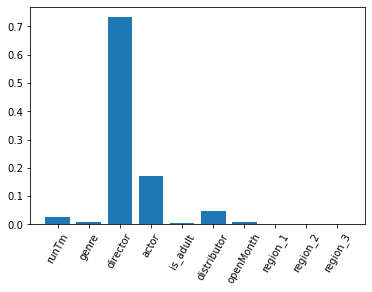

In [19]:
importance = dt_clf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' %(X_train.columns[i],v))

plt.bar(X_train.columns, importance)
plt.xticks(rotation=60)
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_train = rf_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, rf_train))
print("test accuracy : ", accuracy_score(y_test, rf_pred))

train accuracy :  0.9997900923593619
test accuracy :  0.7375122428991185


Feature: runTm, Score: 0.09324
Feature: genre, Score: 0.04395
Feature: director, Score: 0.36200
Feature: actor, Score: 0.25789
Feature: is_adult, Score: 0.01268
Feature: distributor, Score: 0.14022
Feature: openMonth, Score: 0.05878
Feature: region_1, Score: 0.00839
Feature: region_2, Score: 0.00859
Feature: region_3, Score: 0.01426


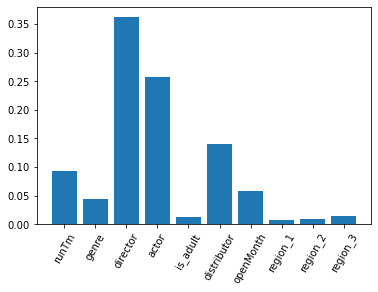

In [21]:
importance = rf_clf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' %(X_train.columns[i],v))

plt.bar(X_train.columns, importance)
plt.xticks(rotation=60)
plt.show()

In [22]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=13, n_jobs=-1, n_estimators=1000, num_leaves=64, boost_from_average = False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)
lgbm_train = rf_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, lgbm_train))
print("test accuracy : ", accuracy_score(y_test, lgbm_pred))

train accuracy :  0.9997900923593619
test accuracy :  0.7335945151811949


Feature: runTm, Score: 33299.00000
Feature: genre, Score: 11880.00000
Feature: director, Score: 36496.00000
Feature: actor, Score: 38087.00000
Feature: is_adult, Score: 2106.00000
Feature: distributor, Score: 28977.00000
Feature: openMonth, Score: 18315.00000
Feature: region_1, Score: 1750.00000
Feature: region_2, Score: 2358.00000
Feature: region_3, Score: 1610.00000


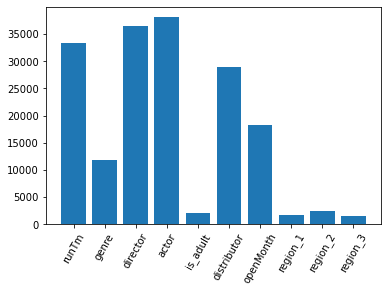

In [23]:
importance = lgbm_clf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' %(X_train.columns[i],v))

plt.bar(X_train.columns, importance)
plt.xticks(rotation=60)
plt.show()

## 7. Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings

warnings.filterwarnings('ignore')

In [25]:
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=13, n_estimators=100, learning_rate=0.01, max_depth=4)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_train_pd = gb_clf.predict(X_train)

print("ACC : ", accuracy_score(y_test, gb_pred))
print("Fit time : ", time.time() - start_time)

ACC :  0.7531831537708129
Fit time :  8.541354894638062


In [26]:
print("Train Accuracy : ", accuracy_score(y_train, gb_train_pd))
print("Test Accuracy : ", accuracy_score(y_test, gb_pred))

Train Accuracy :  0.7917716204869857
Test Accuracy :  0.7531831537708129


In [28]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 300],
    'learning_rate' : [0.01, 0.1]
}

start_time = time.time()
grid = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
grid_pred = grid.predict(X_test)
grid_train_pd = grid.predict(X_train)

print("ACC : ", accuracy_score(y_test, grid_pred))
print("Fit time : ", time.time() - start_time)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
ACC :  0.7468168462291871
Fit time :  57.21729779243469


In [29]:
print("Train Accuracy : ", accuracy_score(y_train, grid_train_pd))
print("Test Accuracy : ", accuracy_score(y_test, grid_pred))

Train Accuracy :  0.8343828715365239
Test Accuracy :  0.7468168462291871


In [30]:
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

y_train_copy -= 1
y_test_copy -= 1

In [31]:
from xgboost import XGBClassifier

start_time = time.time()
xgb = XGBClassifier(n_estimators=200, learning_rate=0.01, max_depth=3)
xgb.fit(X_train.values, y_train_copy.values)

print("Accuracy : ", accuracy_score(y_test_copy.values, xgb.predict(X_test.values)))
print('Fit time : ', time.time() - start_time)

Accuracy :  0.7507345739471106
Fit time :  4.664248943328857


In [32]:
print("Train Accuracy : ", accuracy_score(y_train_copy.values, xgb.predict(X_train.values)))
print("Test Accuracy : ", accuracy_score(y_test_copy.values, xgb.predict(X_test.values)))

Train Accuracy :  0.7638539042821159
Test Accuracy :  0.7507345739471106


In [33]:
from sklearn.ensemble import AdaBoostClassifier

start_time = time.time()
abc = AdaBoostClassifier(n_estimators=200, base_estimator= dt_clf ,learning_rate=0.01)
abc.fit(X_train.values, y_train.values)
abc_pred = abc.predict(X_test)
abc_train_pd = abc.predict(X_train)

print("Accuracy : ", accuracy_score(y_test.values, abc_pred))
print('Fit time : ', time.time() - start_time)

Accuracy :  0.7291870714985309
Fit time :  4.827425003051758


In [34]:
print("Train Accuracy : ", accuracy_score(y_train, abc_train_pd))
print("Test Accuracy : ", accuracy_score(y_test, abc_pred))

Train Accuracy :  0.9617968094038623
Test Accuracy :  0.7291870714985309


---

## 8. Conclusion

- 다양한 Boosting 기법을 통하여 과적합 성향을 줄였다
- feature importances를 확인해본 결과 감독, 배우, 배급사가 관객 수에 가장 큰 영향을 보여준다.

---

## 9. Prediction

### 9.1 데이터 불러오기

In [35]:
pred_df = pd.read_excel('./data/prediction_data.xlsx')

In [36]:
pred_df.head()

,movieNmEn,runTm,nation,genre,director,actor,is_adult,distributor,openMonth
0,Into the Wild,148,2,1,숀 펜,에밀 허쉬,0,NaN,NaN
1,Superbad,113,2,5,그렉 모톨라,조나 힐,1,NaN,NaN
2,Zombieland,88,2,5,루벤 플레셔,우디 해럴슨,1,NaN,NaN
3,Shaun of the Dead,99,3,5,에드가 라이트,사이먼 페그,1,NaN,NaN
4,21 Jump Street,109,2,2,필 로드,조나 힐,1,NaN,NaN


### 9.2 레이블인코딩

In [37]:
pred_copy = pred_df.copy()

In [38]:
pred_copy = pd.get_dummies(data = pred_copy, columns=['nation'], prefix='region')

In [39]:
# 1 = 한국이란 값이 예측 데이터에는 없기에, 0값으로 추가
pred_copy['region_1'] = 0

In [40]:
pred_copy = pred_copy.drop("movieNmEn", axis=1)

In [41]:
# 위의 학습 데이터와 컬럼 순서를 같게 만들어주기
pred_copy = pred_copy.reindex(columns=['runTm', 'genre', 'director', 'actor', 'is_adult', 'distributor', 'openMonth', 'region_1', 'region_2', 'region_3'])

### 9.3 감독/배우/장르 중앙값 추가

In [42]:
# 기존에 학습 데이터에서 사용한 감독/배우 테이블에 해당 이름이 없으면 최소값인 1,001로 입력
for idx, row in pred_copy.iterrows():
    act = row['actor']
    dir = row['director']
    g = row['genre']

    try:
        a_val = actor[actor['actor'] == act]['view'].values[0]
    except:
        a_val = 1001
    
    try:
        dir_val = director[director['director'] == dir]['view'].values[0]
    except:
        dir_val = 1001
    
    pred_copy.loc[idx, 'actor'] = a_val
    pred_copy.loc[idx, 'director'] = dir_val

    g_val = genre[genre['genre'] == g]['view'].values[0]
    pred_copy.loc[idx, 'genre'] = g_val

### 9.4 배급사, 개봉 월 중앙값 추가

In [43]:
distributor.sort_values('view', ascending=False).head(10)

,distributor,view
368,월트디즈니컴퍼니코리아(주),2569599.5
344,에스케이플래닛(주),2142670.0
331,아이러브시네마,1677571.5
2,(유)씨에이치엔터테인먼트,1544486.0
367,월트디즈니컴퍼니코리아 유한책임회사,1408044.5
403,주식회사 해리슨앤컴퍼니,1360046.0
108,(주)스튜디오210,1112238.0
140,(주)에이스메이커무비웍스,878385.5
396,주식회사 에이비오엔터테인먼트,818930.0
276,롯데컬처웍스(주)롯데엔터테인먼트,723622.0


In [44]:
month

,openMonth,view
0,1,41439.0
1,2,51487.5
2,3,23178.5
3,4,29048.0
4,5,18083.0
5,6,30576.0
6,7,24457.5
7,8,36139.0
8,9,26739.0
9,10,19616.0


In [45]:
# 배급사는 해리슨앤컴퍼니, 개봉월은 4월 임의로 지정
pred_copy['distributor'] = 1360046.0
pred_copy['openMonth'] = 29048.0

### 9.5 Normalisation

In [46]:
pred_copy.head()

,runTm,genre,director,actor,is_adult,distributor,openMonth,region_1,region_2,region_3
0,148,13326.0,1001,93086.5,0,1360046.0,29048.0,0,1,0
1,113,31655.0,61808.0,641323.0,1,1360046.0,29048.0,0,1,0
2,88,31655.0,2012489.5,113795.0,1,1360046.0,29048.0,0,1,0
3,99,31655.0,85165.0,85165.0,1,1360046.0,29048.0,0,0,1
4,109,148406.0,655078.0,641323.0,1,1360046.0,29048.0,0,1,0


In [47]:
pred_copy.iloc[:,0:7] = mm.transform(pred_copy.iloc[:, 0:7])

### 9.6 예측 관객수

In [48]:
xgb_prediction = xgb.predict(pred_copy.values)
gb_prediction = gb_clf.predict(pred_copy)

In [49]:
xgb_prediction += 1

In [50]:
pred_copy['xgb_pred'] = xgb_prediction

In [51]:
pred_copy['gb_pred'] = gb_prediction

In [52]:
pred_copy

,runTm,genre,director,actor,is_adult,distributor,openMonth,region_1,region_2,region_3,xgb_pred,gb_pred
0,0.477273,0.044669,8.830835e-08,9.257357e-03,0.0,0.5291,0.350248,0,1,0,1,1
1,0.318182,0.174298,5.369854e-03,6.437098e-02,1.0,0.5291,0.350248,0,1,0,2,2
2,0.204545,0.174298,1.776313e-01,1.133916e-02,1.0,0.5291,0.350248,0,1,0,8,8
3,0.254545,0.174298,7.432472e-03,8.461017e-03,1.0,0.5291,0.350248,0,0,1,2,2
4,0.300000,1.000000,5.776055e-02,6.437098e-02,1.0,0.5291,0.350248,0,1,0,6,6
5,0.340909,0.174298,4.143693e-03,2.061230e-02,0.0,0.5291,0.350248,0,1,0,2,2
6,0.313636,1.000000,7.432472e-03,1.005289e-07,0.0,0.5291,0.350248,0,1,0,1,2
7,0.231818,0.174298,1.196428e-02,2.464225e-02,0.0,0.5291,0.350248,0,1,0,3,4
8,0.345455,0.044669,1.246914e-04,4.906515e-03,0.0,0.5291,0.350248,0,1,0,1,1
9,0.309091,0.174298,1.607499e-02,1.005289e-07,1.0,0.5291,0.350248,0,1,0,1,1


In [53]:
pred_df['xgb_pred'] = xgb_prediction
pred_df['gb_pred'] = gb_prediction

In [54]:
pred_df['distributor'] = '주식회사 해리슨앤컴퍼니'
pred_df['openMonth'] = 4

In [55]:
pred_df

,movieNmEn,runTm,nation,genre,director,actor,is_adult,distributor,openMonth,xgb_pred,gb_pred
0,Into the Wild,148,2,1,숀 펜,에밀 허쉬,0,주식회사 해리슨앤컴퍼니,4,1,1
1,Superbad,113,2,5,그렉 모톨라,조나 힐,1,주식회사 해리슨앤컴퍼니,4,2,2
2,Zombieland,88,2,5,루벤 플레셔,우디 해럴슨,1,주식회사 해리슨앤컴퍼니,4,8,8
3,Shaun of the Dead,99,3,5,에드가 라이트,사이먼 페그,1,주식회사 해리슨앤컴퍼니,4,2,2
4,21 Jump Street,109,2,2,필 로드,조나 힐,1,주식회사 해리슨앤컴퍼니,4,6,6
5,"Crazy, Stupid, Love.",118,2,5,글렌 피카라,스티브 카렐,0,주식회사 해리슨앤컴퍼니,4,2,2
6,Scott Pilgrim vs. the World,112,2,2,에드가 라이트,마이클 세라,0,주식회사 해리슨앤컴퍼니,4,1,2
7,Anchorman: The Legend of Ron Burgundy,94,2,5,아담 맥케이,윌 페렐,0,주식회사 해리슨앤컴퍼니,4,3,4
8,Serenity,119,2,1,스티븐 나이트,매튜 매커너히,0,주식회사 해리슨앤컴퍼니,4,1,1
9,Forgetting Sarah Marshall,111,2,5,니콜라스 스톨러,제이슨 세걸,1,주식회사 해리슨앤컴퍼니,4,1,1


---